In [1]:
import sys
# adding search_optimization_tools to the system path
sys.path.insert(0, '../')

In [2]:
import latexify
import sympy
from search_optimization_tools.algorithms.trajectory_based import SimulatedAnnealing
from search_optimization_tools.problems import ContinuousFunctionBase
import random
import math
import numpy as np

In [3]:
@latexify.with_latex
def simple_example(x):
    return (x-6)**2

simple_example_bounds = np.asarray([[0, 31]])
simple_example_obj = ContinuousFunctionBase(simple_example, simple_example_bounds)
simple_example

<latexify.core.with_latex.<locals>._LatexifiedFunction at 0x17c51e90640>

In [4]:
sa = SimulatedAnnealing(simple_example_obj, max_iter=1000, max_iter_per_temp=100, initial_temp=1000, final_temp=0.0001, cooling_schedule='geometric', cooling_alpha=0.9)
sa.run()
sa.s_best, sa.val_best,sa.t,sa.iter

(array([6.00001648]), 2.715246087828516e-10, 9.97938882337113e-05, 154)

In [5]:
sa.init_annealing()
print ("init_sol=%f, eval_sol=%f, cur_temp=%f, cur_iter=%f" %(sa.s_best, sa.val_best,sa.t,sa.iter))
for i in range(1000):
    sa.annealing_step()
    sa.iter += 1
    sa.update_temperature()
    print ("cur_sol=%f, eval_sol=%f, cur_temp=%f, cur_iter=%f" %(sa.s_best, sa.val_best,sa.t,sa.iter))

init_sol=13.440624, eval_sol=55.362880, cur_temp=1000.000000, cur_iter=1.000000
cur_sol=13.440624, eval_sol=55.362880, cur_temp=810.000000, cur_iter=2.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=729.000000, cur_iter=3.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=656.100000, cur_iter=4.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=590.490000, cur_iter=5.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=531.441000, cur_iter=6.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=478.296900, cur_iter=7.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=430.467210, cur_iter=8.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=387.420489, cur_iter=9.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=348.678440, cur_iter=10.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=313.810596, cur_iter=11.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=282.429536, cur_iter=12.000000
cur_sol=13.321094, eval_sol=53.598415, cur_temp=254.186583,

global minimum: x = 6.0016, f(x) = 0.0000


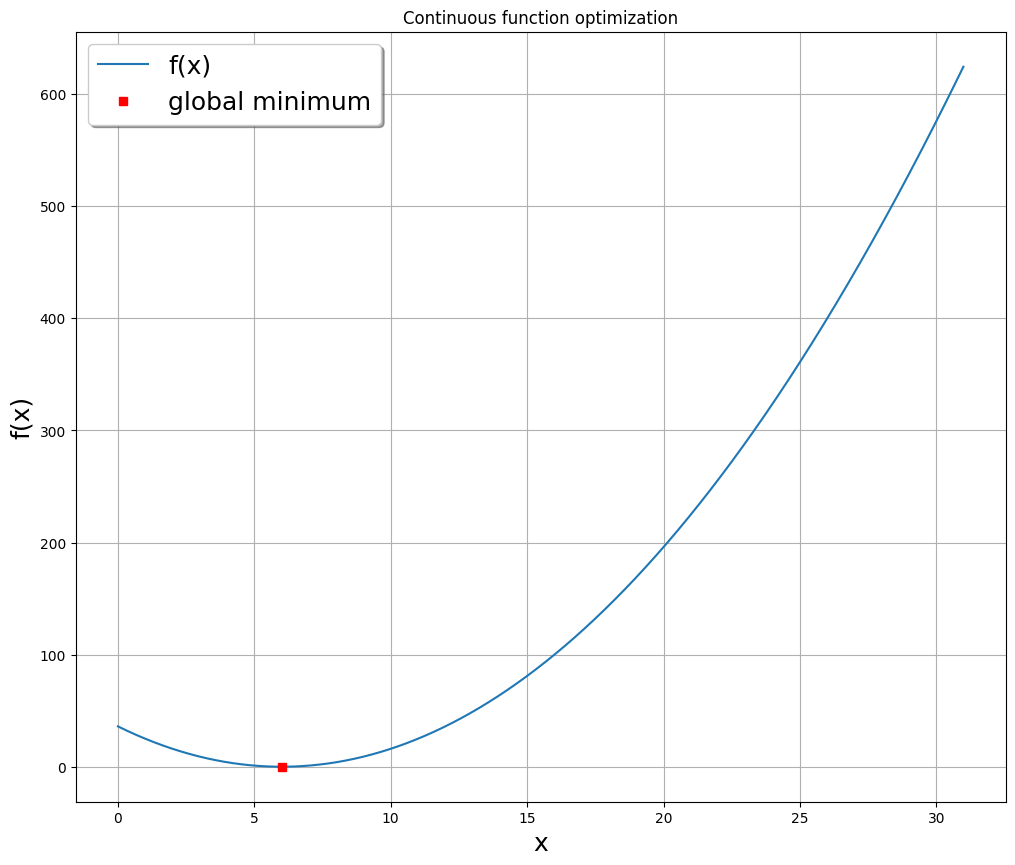

In [6]:
simple_example_obj.plot(sa.s_best)